In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat
from datetime import datetime as dt
sns.set()

from scipy import stats
from scipy.stats import norm
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
from sklearn import preprocessing
from sklearn.feature_selection import f_regression

In [2]:
df_prep = pd.read_csv('hdb_prep.csv')
df_norm = pd.read_csv('hdb_norm.csv')
df_prep = df_prep.drop(['Unnamed: 0'], axis=1)
df_norm = df_norm.drop(['Unnamed: 0'], axis=1)
df_norm.columns

Index(['avg_storey_range', 'floor_area_sqm', 'remaining_lease',
       'distance_to_mrt', 'distance_to_mall', 'distance_cbd', 'flat_type',
       'adj_price', 'region_East', 'region_North', 'region_North East',
       'region_West', 'model_Adjoined flat', 'model_Apartment', 'model_DBSS',
       'model_Executive Maisonette', 'model_Improved', 'model_Maisonette',
       'model_Model A', 'model_Model A2', 'model_New Generation',
       'model_Premium Apartment', 'model_Simplified', 'model_Terrace',
       'model_Type S1S2'],
      dtype='object')

## 5. Modelling

### 5.1 Linear Regression

#### 5.1.1 Model and Statistics

In [3]:
y_D = df_norm[['adj_price']]
x_d = df_norm.drop(['adj_price'], axis=1)

In [4]:
import statsmodels.api as sm

x_constant = sm.add_constant(x_d)
reg_lin = sm.OLS(y_D,x_constant).fit()
reg_lin.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              adj_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 4.135e+04
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:13:06   Log-Likelihood:             1.4199e+05
No. Observations:              192087   AIC:                        -2.839e+05
Df Residuals:                  192062   BIC:                        -2.837e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.8544      0.004   3447.957      0.000      12.847      12.862
avg_storey_range               0.0463      0.000    161.447      0.000       0.046       0.047
floor_area_sqm                 0.1668      0.001    157.490      0.000       0.165       0.169
remaining_lease                0.0810      0.000    187.531      0.000       0.080       0.082
distance_to_mrt               -0.0155      0.000    -54.992      0.000      -0.016      -0.015
distance_to_mall              -0.0166      0.000    -55.485      0.000      -0.017      -0.016
distance_cbd                  -0.1130      0.001   -186.064      0.000      -0.114      -0.112
flat_type                      0.0614      0.001     47.940      0.000       0.059       0.064
region_East                   -0.0659      0.001    -52.393      0.000      -0.068      -0.063
region_North                  -0.1150      0.002    -61.528      0.000      -0.119      -0.111
region_North East             -0.1345      0.001   -108.620      0.000      -0.137      -0.132
region_West                   -0.1042      0.002    -66.350      0.000      -0.107      -0.101
model_Adjoined flat            0.0979      0.007     14.677      0.000       0.085       0.111
model_Apartment               -0.0214      0.002     -9.417      0.000      -0.026      -0.017
model_DBSS                     0.2651      0.003     76.258      0.000       0.258       0.272
model_Executive Maisonette     0.1639      0.017      9.457      0.000       0.130       0.198
model_Improved                -0.0141      0.002     -8.169      0.000      -0.017      -0.011
model_Maisonette               0.0347      0.002     14.627      0.000       0.030       0.039
model_Model A                  0.0208      0.002     10.741      0.000       0.017       0.025
model_Model A2                -0.0121      0.003     -4.250      0.000      -0.018      -0.007
model_New Generation           0.0675      0.002     37.405      0.000       0.064       0.071
model_Premium Apartment        0.0077      0.002      3.697      0.000       0.004       0.012
model_Simplified               0.0329      0.002     16.309      0.000       0.029       0.037
model_Terrace                  0.5642      0.011     52.674      0.000       0.543       0.585
model_Type S1S2                0.1175      0.006     18.975      0.000       0.105       0.130
==============================================================================
Omnibus:                     5372.154   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7523.428
Skew:                           0.311   Prob(JB):                         0.00
Kurtosis:                       3.744   Cond. No.                         171.
============================

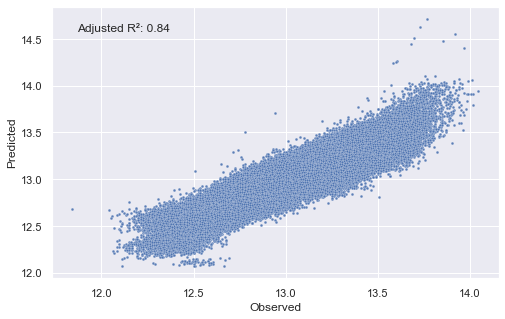

In [5]:
# scatterplot of y (observed) and yhat (predicted)

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=y_D['adj_price'], y=reg_lin.predict(), edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')#, ax.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000])
ax.set_ylabel('Predicted')#, ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000])
ax.annotate('Adjusted R\u00b2: ' + str(format(round(reg_lin.rsquared_adj,2),'.2f')), xy=(0, 1), xytext=(25, -25), 
            xycoords='axes fraction', textcoords='offset points', fontsize=12)

plt.show()
plt.close()

With an adjusted R Squared of 0.88, the features selected are able to account for 88% of the variance in HDB prices.

#### 5.1.2 Homoscedasticity and Normality of Residuals

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


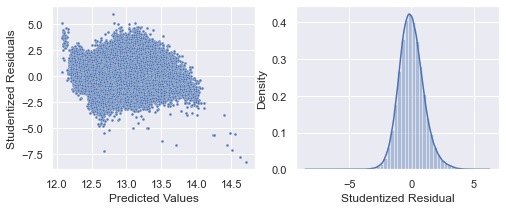

In [6]:


pred = reg_lin.predict()
resi = reg_lin.resid
resi_stud = reg_lin.get_influence().resid_studentized_internal

fig = plt.figure(figsize=(8,3))

ax1 = plt.subplot(121)
sns.scatterplot(x=pred, y=resi_stud, edgecolors='w', s=8)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Studentized Residuals')

ax2 = plt.subplot(122)
sns.distplot(resi_stud, norm_hist=True, hist_kws=dict(edgecolor='w'))
ax2.set_xlabel('Studentized Residual')
plt.show()

Referencing to the graphs above, homoscedaticity seems to be satisfied. The residuals are normally distributed around 0, satisfying the linearity and normality assumptions

#### 5.1.3 Features Importance

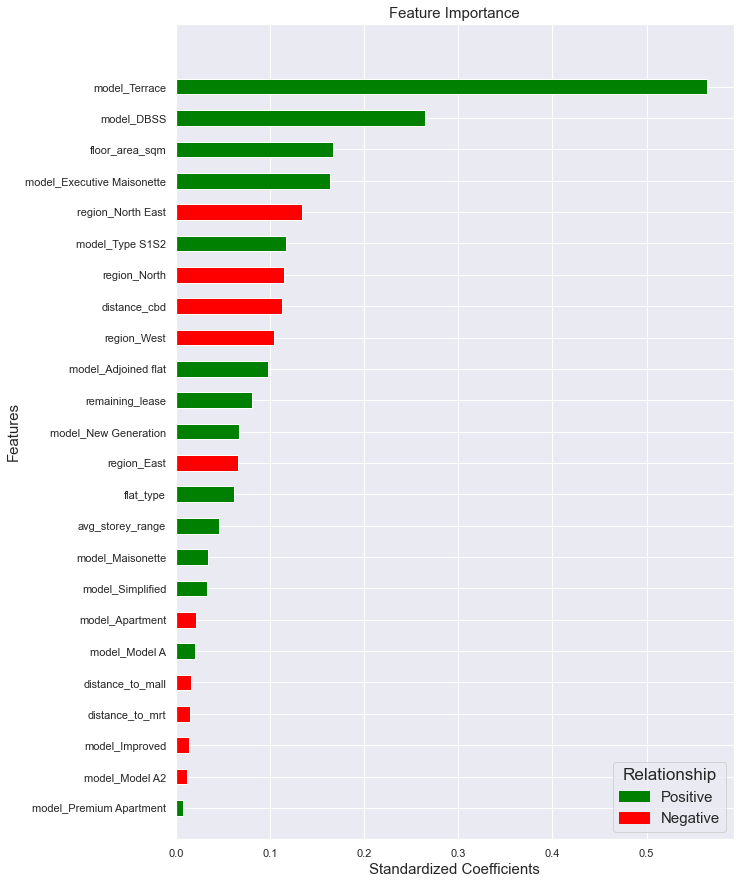

In [7]:
lr_results = pd.read_html(reg_lin.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef = lr_results[['coef']][1:].reset_index().rename(columns={'index':'feature'})
coef['feature_importance'] = np.abs(coef['coef'])
coef = coef.sort_values('feature_importance').reset_index(drop=True)
coef['color'] = coef['coef'].apply(lambda x: 'green' if x>0 else 'red')
coef.plot.barh(x='feature',y='feature_importance',color=coef['color'],figsize=(4,5))
colors = {'Positive':'green', 'Negative':'red'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, title='Relationship', fontsize = '15')
plt.setp(legend.get_title(),fontsize='17')
plt.xlabel('Standardized Coefficients', size=15), plt.ylabel('Features', size=15)
plt.ylim([-1,25])
plt.title('Feature Importance', size=15)
plt.gcf().set_size_inches((10, 15)) 
plt.show()

From this model, it appears that the top 10 most important features are related to the **`flat model`**, **`the size of the flat`** and **`region`** of the HDB. All regions have a negative feature importance. Central region was used for the baseline against other regions, which means that all other regions tend to sell at a lower price.

### 5.2 Random Forest Regressor

In [8]:
from sklearn.model_selection import train_test_split

# Train Test Split
y = df_norm['adj_price']
y = np.exp(y)
X = df_norm.drop(['adj_price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state=52)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (172878, 24)
Shape of X_test: (19209, 24)
Shape of y_train: (172878,)
Shape of y_test: (19209,)


#### 5.2.1 Out-of-Bag Validation

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

In [10]:
# Validation using out-of-bag
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=52)
rf.fit(X_train, y_train.values.ravel())
predicted_train = rf.predict(X_train)

print(f'Out-of-bag R\u00b2 score estimate: {rf.oob_score_:>5.3}')

Out-of-bag R² score estimate: 0.965


In [11]:
# predict and get evaluation metrics on test set
predicted_test = rf.predict(X_test)
oob_test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
oob_mae = mean_absolute_error(y_test, predicted_test)

print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')

Test data R² score: 0.966
Test data Spearman correlation: 0.981
Test data Pearson correlation: 0.983
Test data Mean Absolute Error: 17165


#### 5.2.2 K Fold Validation

In [12]:
from sklearn.model_selection import GridSearchCV

# validation by k-fold cross validation with grid search for best hyperparameters
# hyperparameter values shown below are the tuned final values

param_grid = {
    'max_features': ['auto'], # max number of features considered for splitting a node
    'max_depth': [20], # max number of levels in each decision tree
    'min_samples_split': [15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2]} # min number of data points allowed in a leaf node

rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=52),
                  param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_train, y_train.values.ravel())

print("Best parameters set found on Cross Validation:\n\n", rfr.best_params_)
print("\nCross Validation R\u00b2 score:\n\n", rfr.best_score_.round(3))

Best parameters set found on Cross Validation:

 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}

Cross Validation R² score:

 0.961


In [13]:
# predict and get evaluation metrics for test set

cv_predicted_test = rfr.predict(X_test)

cv_test_score = r2_score(y_test, cv_predicted_test)
spearman = spearmanr(y_test, cv_predicted_test)
pearson = pearsonr(y_test, cv_predicted_test)
cv_mae = mean_absolute_error(y_test, cv_predicted_test)

print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(cv_mae)}')

Test data R² score: 0.963
Test data Spearman correlation: 0.979
Test data Pearson correlation: 0.981
Test data Mean Absolute Error: 18069


#### 5.2.3 Comparing OOB and K Fold 

C:\Users\edge\AppData\Local\Temp/ipykernel_7560/2978767903.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\edge\AppData\Local\Temp/ipykernel_7560/2978767903.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\edge\AppData\Local\Temp/ipykernel_7560/2978767903.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\edge\AppData\Local\Temp/ipykernel_7560/2978767903.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/100

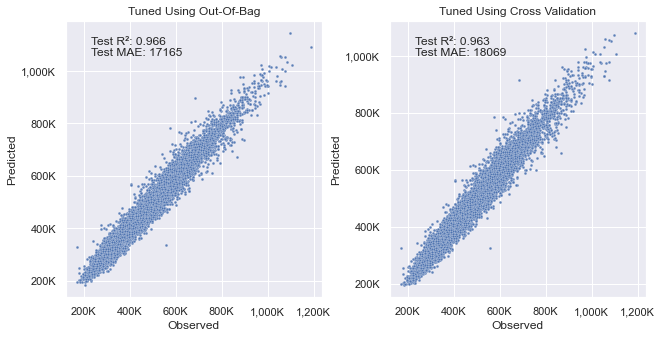

In [14]:
# scatterplots of y (observed) and yhat (predicted)

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=y_test, y=predicted_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=y_test, y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

With its high R Squared score, Random Forest seems to be the better choice of modelling as compared to Linear Regression.

C:\Users\edge\AppData\Local\Temp/ipykernel_7560/2107065267.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


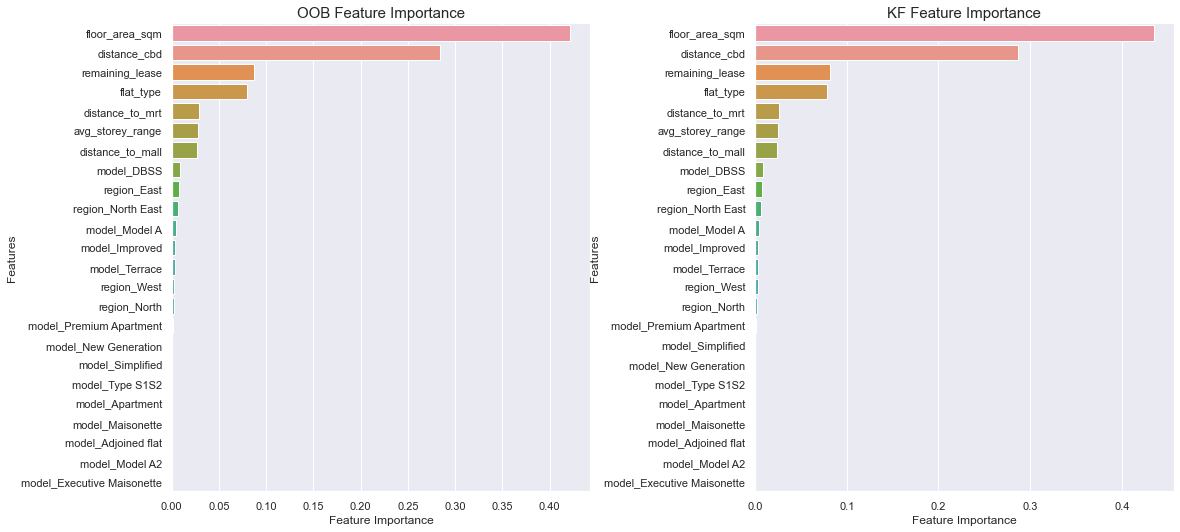

In [19]:
ax1 = plt.subplot(121)
features = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=features)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

ax2 = plt.subplot(122)
features = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=features)
ax2.set_title('KF Feature Importance', size=15)

plt.gcf().set_size_inches((18, 8)) 
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()

The features importance produced by Random Forest Regressor shows a different result than the Linear Regression Model. The top more important features are **`size of the flat`**, **`Distance to CBD`**, **`Remaining Lease`**, and **`flat type`**, whereas the most important features in the Linear Regression model relates to region and flat model.

Tree-based models appear to give lower importance to categorical values. This is due to the importance score being a measurement of how often the feature was selected for splitting and how much gain in purity was achieved as a result of the selection.

## 6. Conclusion

Looking at the results of the models, linear regression showed that **`regions, floor area and flat model`** are the top drivers of HDB prices. Random Forest produced a different result. Similarly to Linear Regression model, **`floor area`** is still the top driver of HDB prices. On the other hand, different from the Regression model, **`distance to cbd, remaining lease and flat type`** appear to be the top drivers of HDB prices in the Tree based models. This happens as tree-based models tend to give lower importance to categorical variables (region and flat model) due to the way it computes importance.

Nonetheless, the *size of the flat*, *lease date*, and certain aspects of the *location* are consistently the most important drivers of HDB resale prices.

**Future considerations:**

1. Compute travelling time instead of euclidean distance
2. To include **Shapley Values** to explain which features contribute most in determining prediction results
3. To remove flat type from the variables. Flat type seems to be multicollinear to both floor area and flat model, removing this might give a fairer and better results, though I think the difference will be small.